In [22]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import random 

n=2
fs = 'xx-large'

def area(x,y):
    return np.abs(0.5*(x[0]*(y[1]-y[2]) + x[1]*(y[2]-y[0])+ x[2]*(y[0]-y[1])))

In [23]:
#metodo triangoli

X = [0,np.sqrt(3)/2,-np.sqrt(3)/2]
Y = [1,-0.5,-0.5]
max_iter = 6;
A1 = area(X,Y)

for i in range(max_iter):
    points = len(X)
    tmpX = []
    tmpY = []
    newX = []
    newY = []
    for j in range(points):
        xm = 0.5 * (X[j] + X[j-1])
        ym = 0.5 * (Y[j] + Y[j-1])
        mod = np.sqrt(xm*xm + ym*ym)
        tmpX.append(xm/mod)
        tmpY.append(ym/mod)
    A1 += area(tmpX,tmpY)
    for j in range(2*points):
        if(j%2 == 0):
            idx = int(j/2)
            newX.append(tmpX[idx])
            newY.append(tmpY[idx])
        else:
            idx = int((j+1)/2)-1
            newX.append(X[idx])
            newY.append(Y[idx])
    X = newX
    Y = newY

In [35]:
#metodo montecarlo (tipo)

points = int(1e6)
x=[]
y=[]
inside=[]

for i in range(points):
    x.append(random.uniform(-1,1))
    y.append(random.uniform(-1,1))
    inside.append(x[i]**2 + y[i]**2 <= 1)

x = np.array(x)
y = np.array(y)
    
circle = 0
for i in range(points):
    if(inside[i]):
        circle +=1

pi = 4*circle/points
print("stima pi = {}".format(pi))

stima pi = 3.142048


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

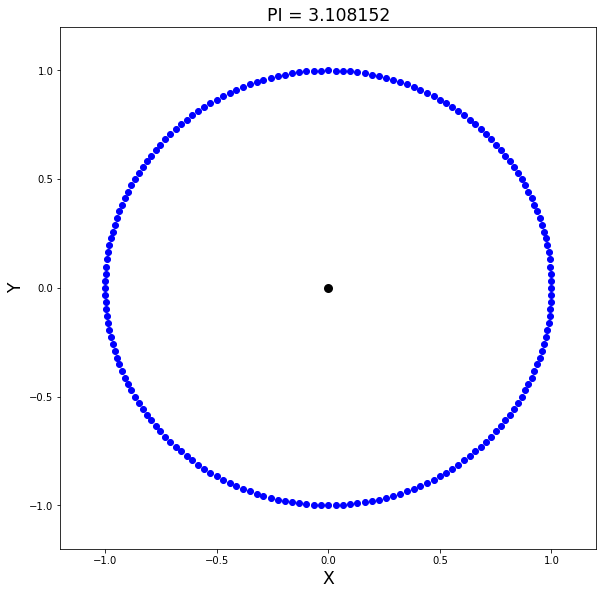

<Figure size 691.2x691.2 with 0 Axes>

In [34]:
fig = plt.figure(0, figsize=[n*4.8,n*4.8])
_ = plt.scatter(X,Y, lw=1, color='blue',)
_ = plt.scatter(0,0, color='black', marker='o',lw=3)
_ = plt.xlabel('X', fontsize=fs)
_ = plt.ylabel('Y', fontsize=fs)
_ = plt.title('PI = %f'%A1,fontsize=fs)
_ = plt.xlim(-1.2,1.2)
_ = plt.ylim(-1.2,1.2)

fig2 = plt.figure(2, figsize=[n*4.8,n*4.8])
# _ = plt.scatter(x[~inside],y[~inside],color='blue')
_ = plt.scatter(x[x**2 + y**2 <= 1],y[x**2 + y**2 <= 1],color='red')
_ = plt.scatter(0,0, color='black', marker='o',lw=3)
_ = plt.xlabel('X', fontsize=fs)
_ = plt.ylabel('Y', fontsize=fs)
_ = plt.title('PI = %f'%pi,fontsize=fs)
_ = plt.xlim(-1.2,1.2)
_ = plt.ylim(-1.2,1.2)